<div style="font-size : 48px;border: 1px solid black; padding: 20px; border-radius: 5px; background-color: lightblue; text-align : center">
    Détecter des faux billets
</div>

<div style="font-size: 38px; text-decoration: underline; text-decoration-color: blue;"> Introduction
</di
>

## Contexte

Votre entreprise vient de décrocher un contrat avec l’Organisation nationale de lutte contre le faux-monnayage (ONCFM) et elle souhaite vous y envoyer en tant que senior data analyst pour cette mission.

## L'objectif

L'ONCFM met en place des méthodes d’identification des faux billets en euros pour lutter contre la contrefaçon. Pour aller plus vite dans cette lutte, nous souhaitons mettre à disposition des équipes une application de machine learning. Celle-ci leur permettra, après avoir scanné des billets (longueur, hauteur, largeur, etc.), de faire une prédiction sur la nature des billets (vrai billet ou faux billet).

## Déscription du jeu de données

Nous avons à disposition dans notre dataset 1500 billets. 1000 billets sont vrais et 500 billets sont faux. Nos variables lié aux billets sont : diagonale, hauteur_gauche, hauteur_droite, marge_bas, marge_haut, longueur. Nous aurons à entrainer et tester nos modèles de machine pour finalement interpréter et utilisé notre modèle de prédiction fonctionnel.



<div style="font-size: 38px; text-decoration: underline; text-decoration-color: blue;"> Sommaire
</di
>

s
es
es
o	Perspectives pour de futurs travaux
es
o	Perspectives pour de futurs travaux


<div style="font-size : 38px; color: darkblue; font-weight : bold; margin-top: 20px">
    Préparation des données
</div>

## Importation

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Sklearn : gradient/KNN/random forest/régression/etc...

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc

In [2]:
# Importation du fichier billets.csv
billets = pd.read_csv(r'C:\Users\chouh\Desktop\Openclassrooms\Projet 12 - Détectez des faux billets avec R ou Python\billets.csv', delimiter=';')

In [3]:
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


## Néttoyage des données

In [4]:
# repérer les valeurs manquante
valeurs_manquantes = billets.isna().sum()
valeurs_manquantes

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [5]:
# Suppression des doublons
doublons = billets.drop_duplicates()
print(doublons.shape)
print('Nous n\'avons pas de doublons')

(1500, 7)
Nous n'avons pas de doublons


Avant de pouvoir continuer, nous souhaitons remplir les 37 cellules vides pour réaliser nos études. Il faudra, grâce à la régression linéaire, prédir les valeurs à remplir dans nos cellules vides.

In [6]:
billets_manquants = billets.columns[billets.isnull().any()].tolist()
billets_complet = billets.dropna()

#Entrainer le modèle de régression linéaire
X = billets_complet[['margin_up']]  # Variable indépendante
y = billets_complet['margin_low']   # Variable dépendante

model = LinearRegression()
model.fit(X, y)

#Prédire et remplacer les valeurs vides
missing_data = billets[billets['margin_low'].isnull()]
predicted_values = model.predict(missing_data[['margin_up']])
billets.loc[billets['margin_low'].isnull(), 'margin_low'] = predicted_values

In [7]:
print(billets.isna().sum())
print()
print('Nous venons de completer nos valeurs manquantes grâce à la régression linéaire. Nous pouvons à présent passer à la normalisation des données.')

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Nous venons de completer nos valeurs manquantes grâce à la régression linéaire. Nous pouvons à présent passer à la normalisation des données.


In [8]:
# Normalisation des données
X = billets.drop('is_genuine', axis=1)
y = billets['is_genuine']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

billets_scaled = pd.DataFrame(X_scaled, columns=X.columns)
billets_scaled['is_genuine'] = y.values

In [9]:
billets_scaled

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,-0.486540,2.774123,3.163240,0.054826,-1.128325,0.173651,True
1,-1.633729,-2.236535,-0.799668,-1.086586,-0.696799,0.471666,True
2,2.397823,1.504756,-1.291191,-0.127800,-0.912562,0.551901,True
3,-1.961498,-0.399294,0.060498,-1.314869,-0.610494,0.953075,True
4,-0.748754,0.836669,-1.414072,-0.675678,1.417677,-0.158750,True
...,...,...,...,...,...,...,...
1495,-0.683201,1.170713,0.767063,-0.097363,-0.265273,-1.602978,False
1496,0.758981,2.005822,1.596509,1.196238,0.942999,-1.958303,False
1497,-0.519316,-0.065250,0.613462,1.561490,0.899846,-0.835016,False
1498,0.332882,0.836669,0.429141,1.044049,1.331372,-0.491152,False


## Exploration initiale des données

In [10]:
# Describe
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.483975,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.657300,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.020000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.320000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.860000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


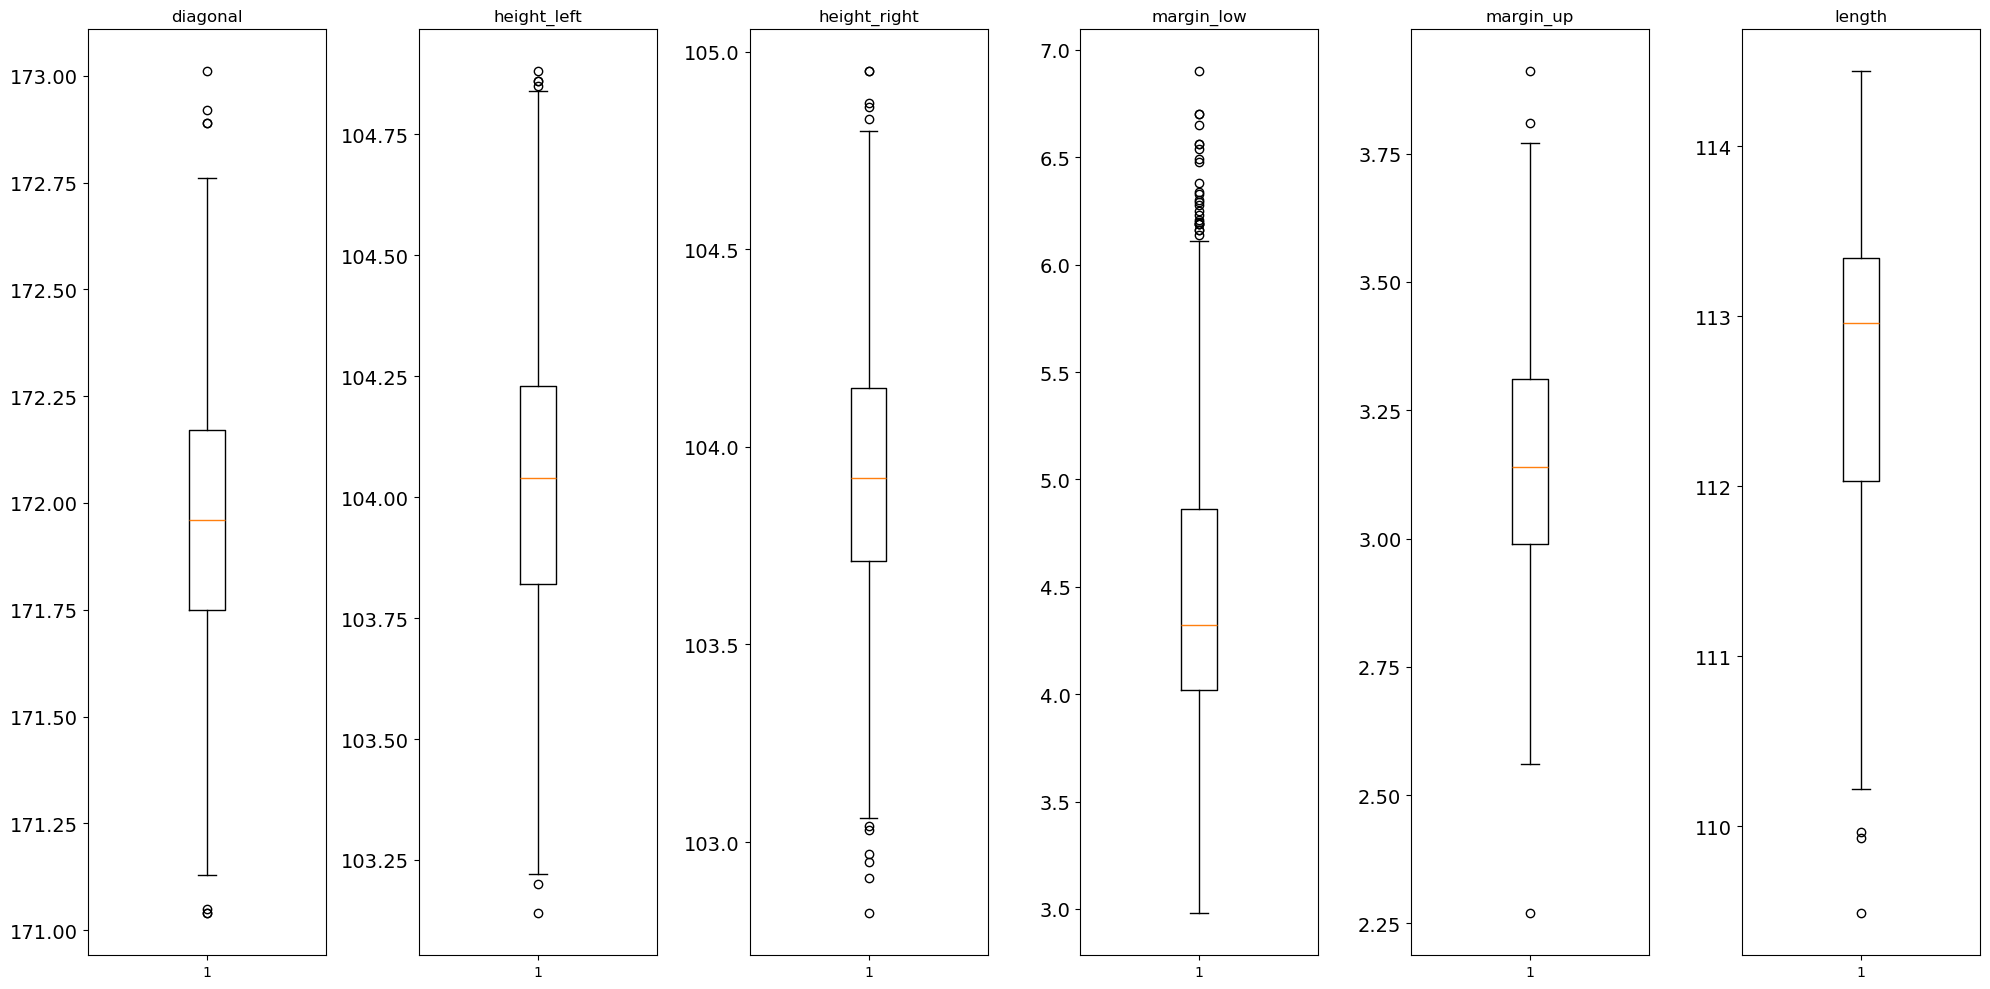

In [11]:
fig, axs = plt.subplots(1, len(X.columns), figsize=(20, 10))

for i, ax in enumerate(axs):
    ax.boxplot(X.iloc[:, i])
    ax.set_title(X.columns[i])
    ax.tick_params(axis='y', labelsize='14')

plt.tight_layout()
plt.show()

Ce premier graphique présente des boxplots pour six caractéristiques des billets : la diagonale, la hauteur à gauche et à droite, la marge inférieure et supérieure, ainsi que la longueur. Les boxplots permettent d'observer la distribution des données pour chaque caractéristique, en mettant en évidence les médianes, les étendues interquartiles (IQR), ainsi que les valeurs extrêmes ou aberrantes.

Pour la diagonale, on observe une distribution relativement centrée avec quelques valeurs aberrantes au-dessus de la limite supérieure, suggérant la présence de quelques billets légèrement plus longs que la majorité. Les caractéristiques de hauteur à gauche et à droite montrent également quelques valeurs extrêmes, mais leur distribution reste relativement symétrique et concentrée autour de valeurs similaires.

La marge inférieure affiche une concentration de valeurs aberrantes, principalement au-dessus de la limite supérieure, indiquant une variabilité plus importante pour cette caractéristique. Enfin, la marge supérieure et la longueur présentent également des distributions relativement symétriques avec quelques valeurs extrêmes, mais rien qui ne suggère de patterns inattendus ou anormaux significatifs.

Ces analyses descriptives fournissent une vue d'ensemble sur la dispersion et les anomalies potentielles dans les données, ce qui est essentiel pour évaluer la qualité des mesures et préparer les données pour des étapes d'analyse plus avancées.

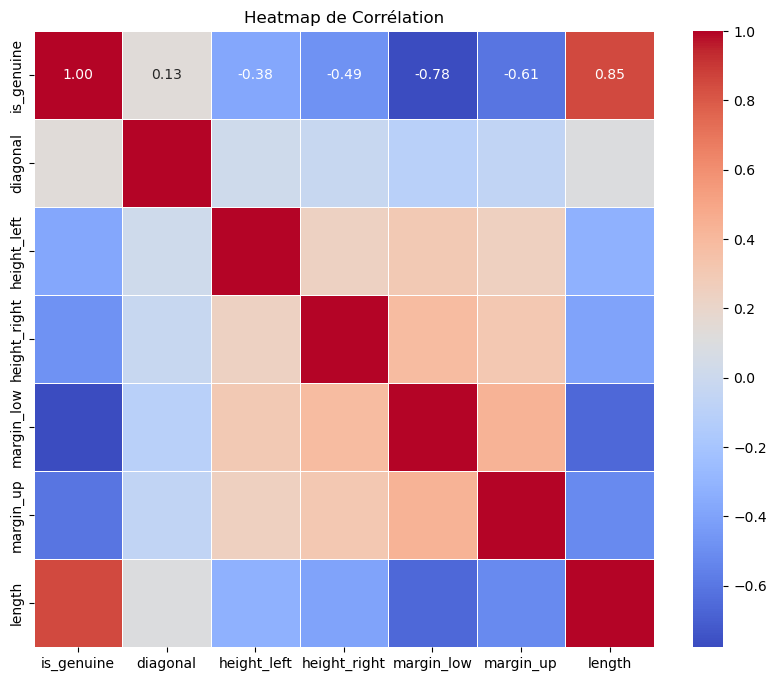

In [12]:
correlation_matrix = billets.corr()

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de Corrélation')
plt.show()

Ce graphique présente une heatmap de corrélation, qui permet de visualiser les relations entre les différentes caractéristiques des billets, ainsi qu'avec la variable cible is_genuine (qui indique si un billet est authentique ou non). Chaque cellule de la heatmap montre le coefficient de corrélation entre deux variables, avec des couleurs allant du bleu (corrélation négative) au rouge (corrélation positive).

On observe plusieurs points intéressants dans cette heatmap. La variable diagonal est fortement corrélée avec length (0.85), ce qui est logique étant donné que ces deux mesures sont liées aux dimensions physiques du billet. De plus, height_left et height_right présentent une corrélation négative notable avec margin_low, indiquant que ces caractéristiques varient de manière opposée. Une corrélation négative significative est également visible entre height_right et is_genuine (-0.78), suggérant que la hauteur à droite peut être un indicateur important pour distinguer les billets authentiques des faux.

Ces corrélations fournissent des informations précieuses pour comprendre les relations entre les différentes caractéristiques du dataset. Elles peuvent aussi guider la sélection des caractéristiques les plus pertinentes pour les étapes ultérieures de modélisation, en identifiant celles qui sont les plus corrélées avec la variable cible.

<div style="font-size : 38px; color: darkblue; font-weight : bold; margin-top: 20px">
    Analyse exploratoire des données
</div>

## Visualisation des caractéristiques des billets (distributions, corrélations)

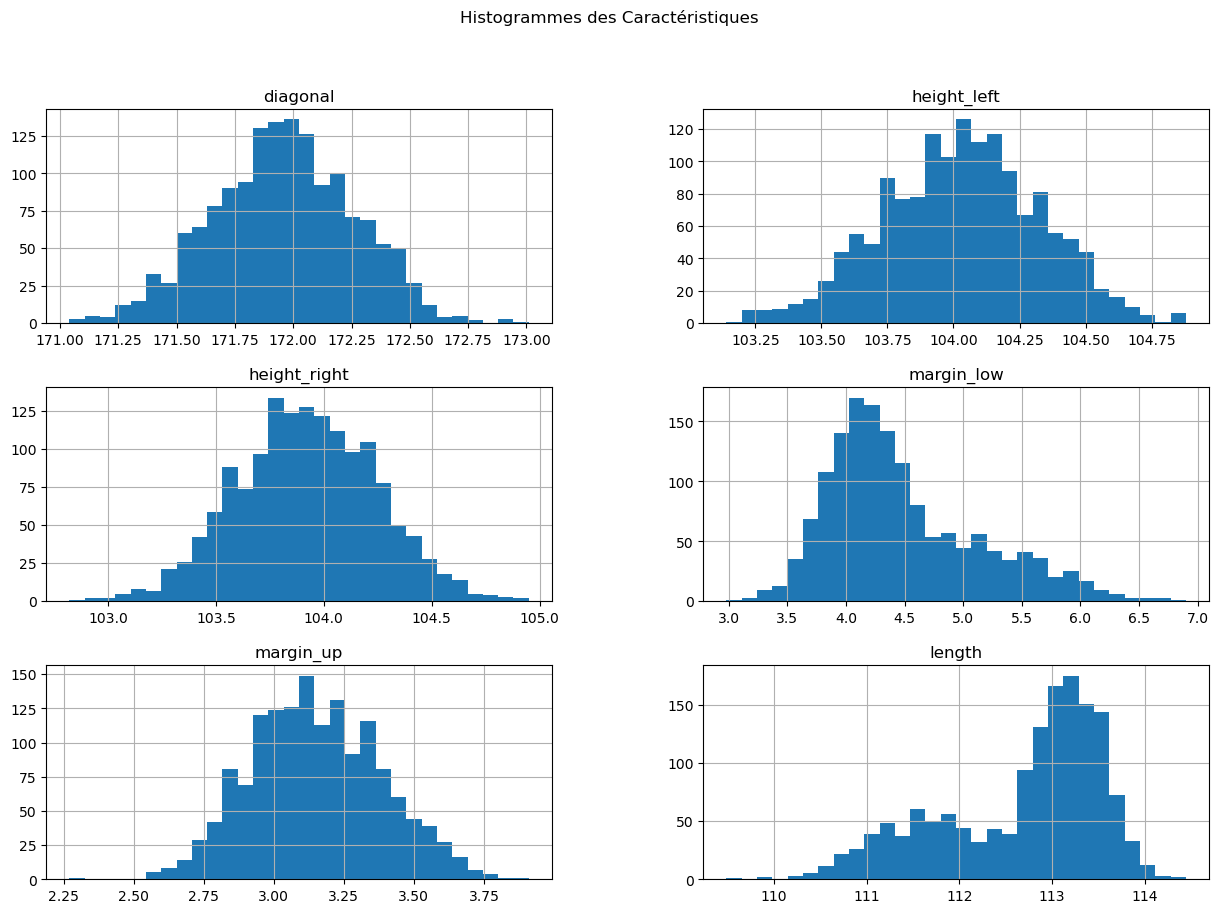

In [13]:
# Histogramme de distribution
billets.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogrammes des Caractéristiques')
plt.show()

Ce graphique présente les histogrammes des distributions pour six caractéristiques des billets : diagonale, hauteur à gauche et à droite, marge inférieure et supérieure, et longueur. Ces histogrammes permettent de visualiser la répartition des valeurs pour chaque caractéristique, offrant ainsi un aperçu de la distribution des données.

On observe que la plupart des caractéristiques suivent une distribution proche de la normale, avec une concentration de valeurs autour de la médiane et des queues relativement symétriques de chaque côté. Par exemple, les caractéristiques de diagonale, de hauteur à gauche et à droite, ainsi que les marges inférieure et supérieure montrent toutes des distributions centrées, suggérant que ces mesures sont relativement homogènes au sein du jeu de données.

Cependant, la longueur présente une distribution légèrement différente, avec une asymétrie notable vers la droite, indiquant une plus grande variance dans cette mesure. De même, la marge inférieure montre une légère asymétrie, ce qui pourrait refléter des variations dans la fabrication ou l'impression des billets.

Ces histogrammes offrent une vue d'ensemble utile pour comprendre comment les différentes caractéristiques se répartissent dans le dataset, et peuvent également aider à identifier des anomalies ou des outliers qui pourraient nécessiter une attention particulière dans les étapes suivantes de l'analyse.

C:\Users\chouh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chouh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chouh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chouh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

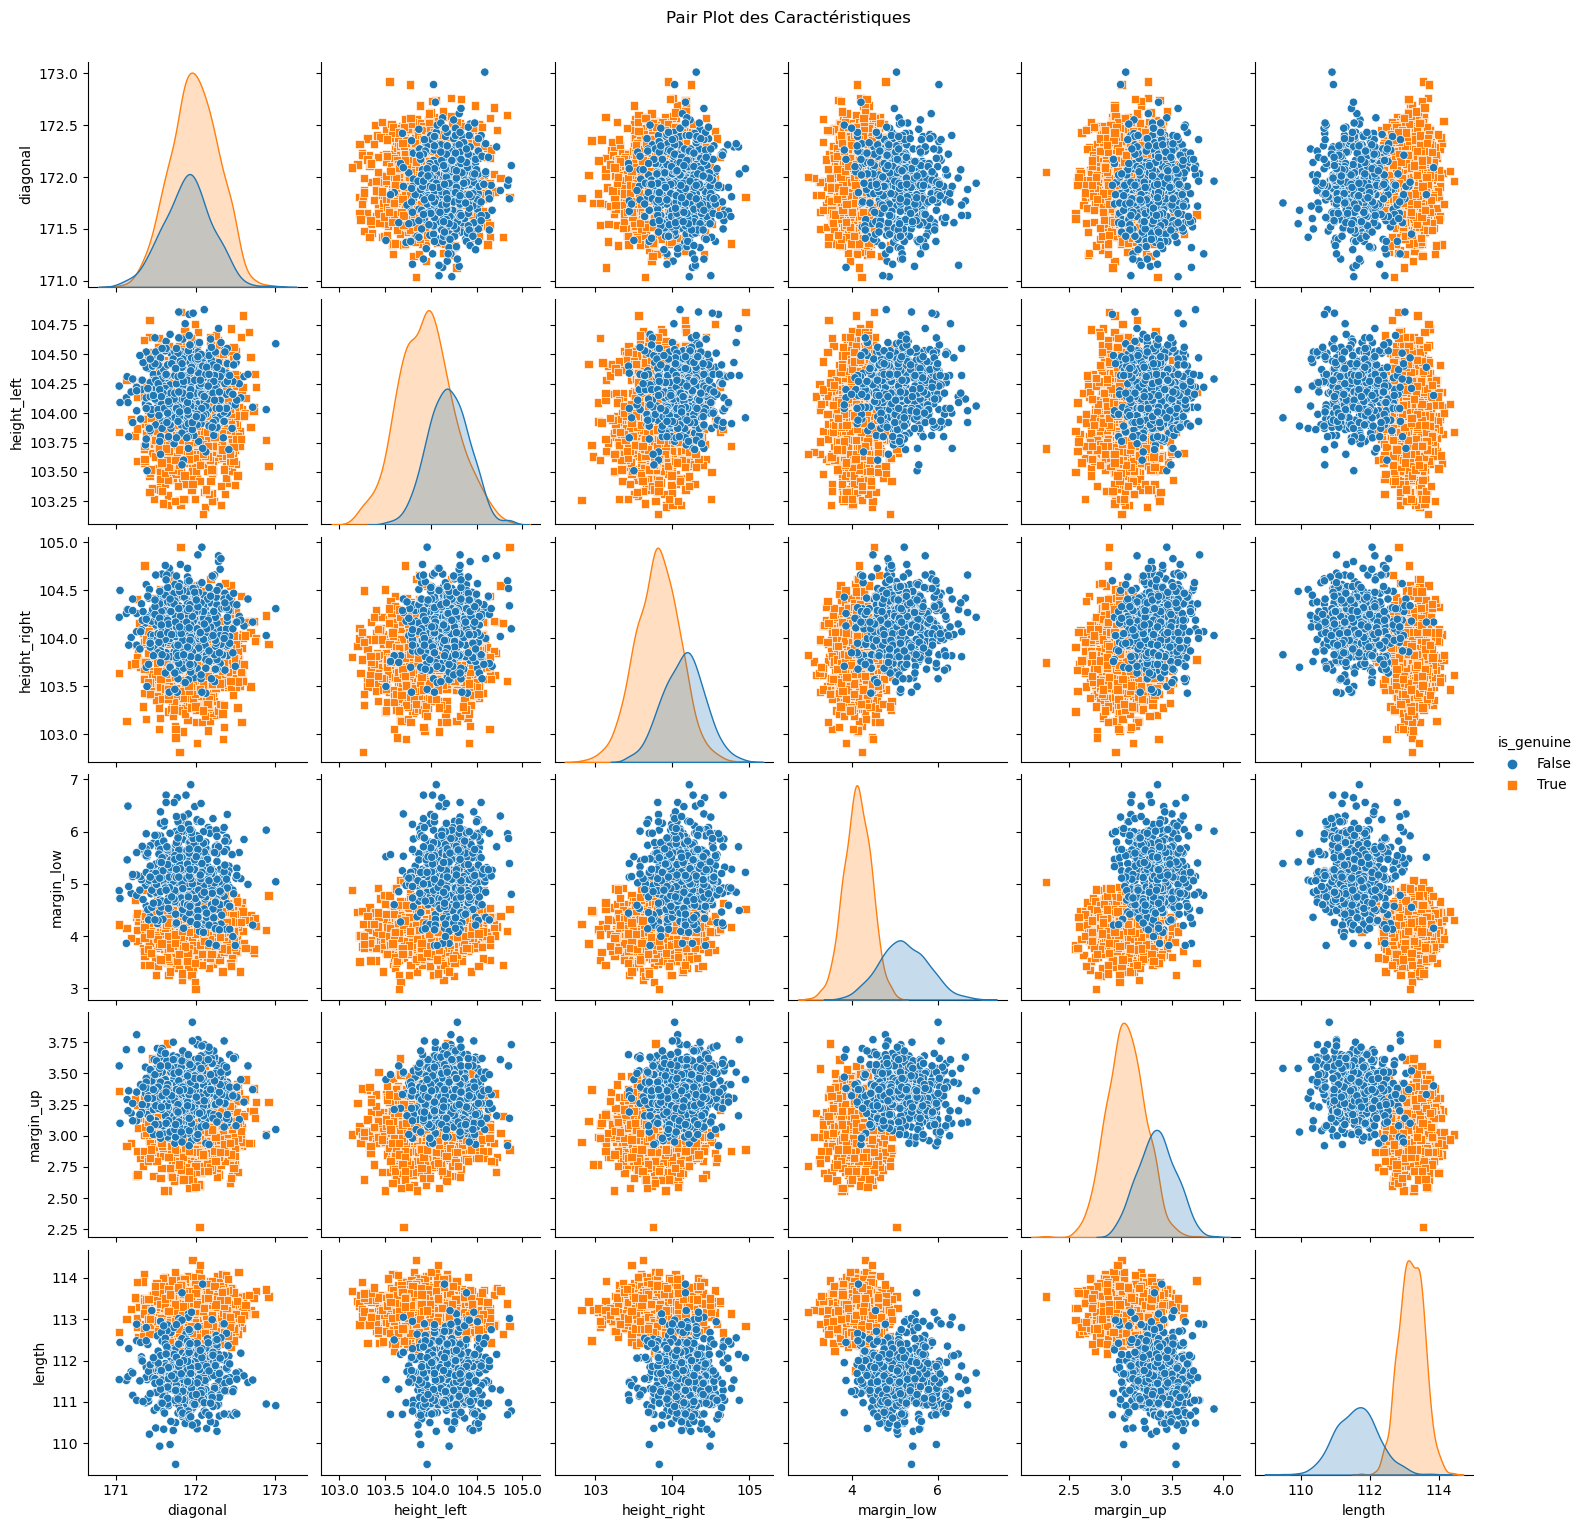

In [14]:
# Pairplot
sns.pairplot(billets, hue='is_genuine', markers=["o", "s"])
plt.suptitle('Pair Plot des Caractéristiques', y=1.02)
plt.show()

Ce pair plot visualise les relations entre différentes caractéristiques des billets, tout en distinguant les billets authentiques (en bleu) des faux (en orange). Chaque graphique en diagonale montre la distribution d'une seule caractéristique, tandis que les autres cases montrent les relations entre deux caractéristiques, avec les points colorés selon l'authenticité des billets.

Plusieurs observations peuvent être faites à partir de ce pair plot. Tout d'abord, certaines caractéristiques, comme la diagonale et la longueur, montrent des séparations assez claires entre les deux classes, suggérant qu'elles pourraient être des indicateurs clés pour différencier les billets authentiques des faux. D'autres caractéristiques, comme la hauteur à gauche et à droite, semblent moins distinctives, avec un chevauchement plus important entre les classes.

Le pair plot révèle également des relations potentielles entre les caractéristiques, par exemple, entre margin_low et height_right, où les distributions des classes semblent se distinguer légèrement. Cependant, la plupart des relations entre les paires de caractéristiques montrent un mélange important entre les classes, ce qui indique que plusieurs caractéristiques combinées seront nécessaires pour une classification efficace.

En résumé, ce pair plot fournit une vue d'ensemble des relations entre les différentes caractéristiques des billets, et met en lumière les caractéristiques les plus prometteuses pour la tâche de classification. Il souligne également l'importance de combiner plusieurs caractéristiques pour améliorer la capacité de détection des faux billets.

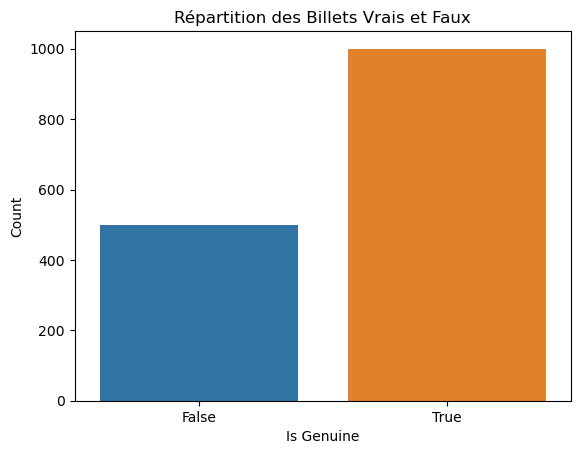

In [15]:
sns.countplot(data=billets, x='is_genuine')
plt.title('Répartition des Billets Vrais et Faux')
plt.xlabel('Is Genuine')
plt.ylabel('Count')
plt.show()

Ce graphique en barres illustre la répartition des billets authentiques (True) et faux (False) dans le dataset. On observe que le dataset est légèrement déséquilibré, avec un plus grand nombre de billets authentiques (environ 1000) par rapport aux billets faux (environ 500). Cette distribution montre que, bien que les classes soient déséquilibrées, il existe encore un nombre substantiel de faux billets pour permettre un entraînement adéquat des modèles de classification.

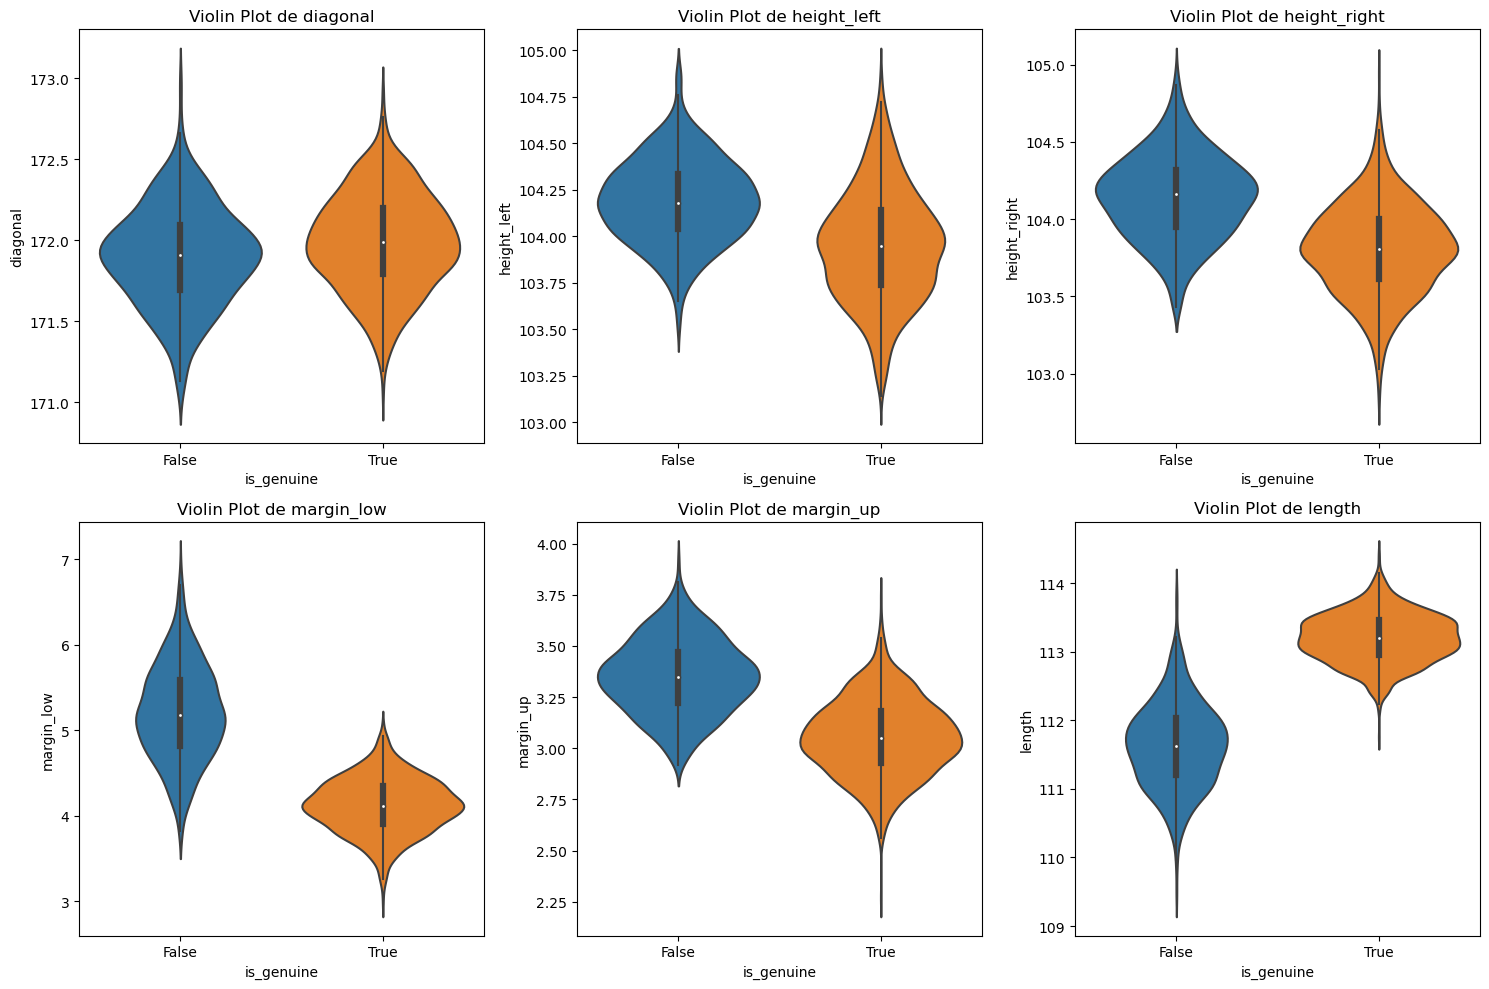

In [16]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(billets.columns[1:], 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='is_genuine', y=column, data=billets)
    plt.title(f'Violin Plot de {column}')
plt.tight_layout()
plt.show()

Ce graphique présente des violin plots pour six caractéristiques des billets : diagonale, hauteur à gauche et à droite, marge inférieure et supérieure, et longueur, en fonction de l'authenticité des billets (is_genuine). Les violin plots combinent les informations d'un boxplot et d'un estimateur de densité de noyau, permettant de visualiser la distribution des données pour chaque caractéristique tout en comparant les billets authentiques (en orange) et faux (en bleu).

On observe des différences notables entre les distributions des billets authentiques et faux pour plusieurs caractéristiques. Par exemple, la caractéristique length montre une séparation claire, avec les billets authentiques ayant tendance à être plus longs que les faux. De même, les distributions de margin_low et margin_up diffèrent également de manière significative entre les deux classes, suggérant que ces caractéristiques sont de bons indicateurs pour distinguer les billets authentiques des faux.

En revanche, pour d'autres caractéristiques comme height_left et height_right, les distributions des deux classes se chevauchent davantage, ce qui pourrait indiquer qu'elles sont moins discriminantes pour cette tâche de classification.

En résumé, ces violin plots révèlent des différences importantes dans les distributions des caractéristiques en fonction de l'authenticité des billets. Cela souligne l'importance de certaines caractéristiques pour la détection des faux billets et confirme leur pertinence pour les étapes ultérieures de modélisation.

## Séparation des données en ensembles d'entraînement et de test

In [17]:
# Création des groupes
X = billets.drop('is_genuine', axis=1)
y = billets['is_genuine']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Pour ce projet, les données ont été séparées en deux ensembles, avec 80% des données utilisées pour l'entraînement du modèle et 20% réservées pour l'évaluation finale. Cette répartition permet au modèle d'apprendre sur une portion substantielle des données tout en garantissant une évaluation fiable et objective de ses performances sur un ensemble de test non vu. Ce choix d'une division 80/20 est courant en machine learning, équilibrant efficacement l'apprentissage du modèle et sa validation.

<div style="font-size : 38px; color: darkblue; font-weight : bold; margin-top: 20px">
    Implémentation des Algorithmes
</div>

<div style="font-size: 32px; text-decoration: underline; text-decoration-color: blue; color : darkblue"> K-means
</di
>

## Explication de l'algorithme K-means

L'algorithme K-means est une méthode de clustering non supervisée largement utilisée pour partitionner un ensemble de données en k clusters distincts. L'objectif de cet algorithme est de regrouper les points de données de manière à ce que les points à l'intérieur d'un même cluster soient aussi similaires que possible, tout en maximisant la différence entre les clusters.

Le processus de K-means commence par l'initialisation de k centroids, qui sont des points représentant le centre de chaque cluster. Ces centroids sont souvent choisis de manière aléatoire. Ensuite, chaque point de données est affecté au centroid le plus proche, formant ainsi des clusters initiaux. Une fois que tous les points de données sont assignés, les centroids sont recalculés comme étant la moyenne des points dans chaque cluster. Ce processus d'affectation et de recalcul se répète jusqu'à ce que les centroids n'évoluent plus significativement, indiquant que l'algorithme a convergé vers une solution stable.

L'un des principaux avantages de K-means est sa simplicité et son efficacité en termes de calcul, ce qui en fait un choix populaire pour explorer la structure des données. Cependant, l'algorithme nécessite que l'utilisateur spécifie le nombre de clusters à l'avance et il peut être sensible aux points aberrants et à l'initialisation des centroids. Dans ce projet, K-means a été utilisé pour explorer la structure sous-jacente des données des billets, offrant ainsi une première segmentation utile pour les analyses ultérieures.

## Application de K-means sur les données

In [18]:
#PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)

# Variance expliquée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(explained_variance)
print(cumulative_variance)

[0.43150755 0.16958832 0.13045056 0.11839165 0.09565892 0.054403  ]
[0.43150755 0.60109587 0.73154643 0.84993808 0.945597   1.        ]


Dans cette analyse de la variance expliquée par le PCA, les résultats montrent que la première composante principale explique environ 43,2% de la variance totale des données, tandis que les deux premières composantes cumulées expliquent environ 60,1% de la variance. Les trois premières composantes atteignent environ 73,2% de la variance totale, et ainsi de suite, jusqu'à couvrir 100% avec toutes les composantes. Ces résultats indiquent qu'une grande partie de l'information contenue dans les données peut être capturée avec les premières composantes principales, rendant le PCA efficace pour réduire la dimensionnalité tout en conservant l'essentiel de la variation des données.

In [19]:
pca

PCA()

C:\Users\chouh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chouh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\chouh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chouh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

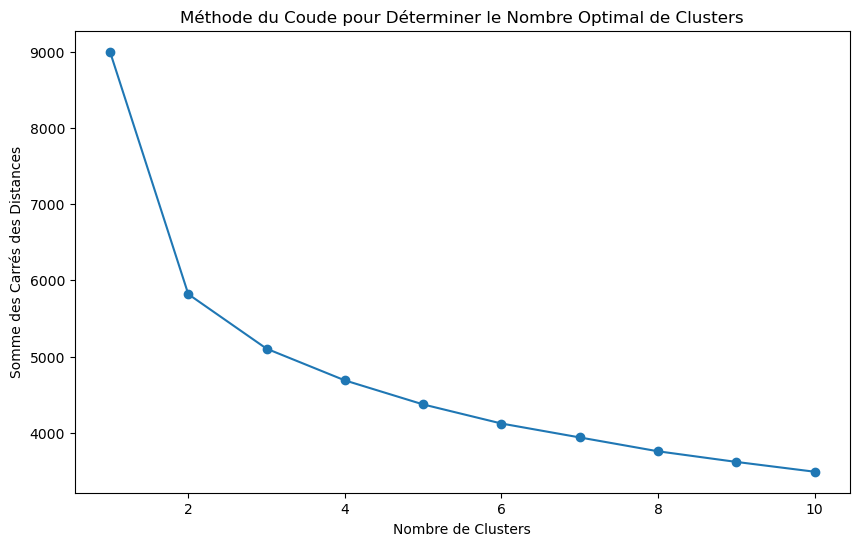

In [20]:
wcss = []
for i in range(1, 11):  # Tester de 1 à 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Tracer la courbe pour visualiser la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Méthode du Coude pour Déterminer le Nombre Optimal de Clusters')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Somme des Carrés des Distances')
plt.show()

C:\Users\chouh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chouh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


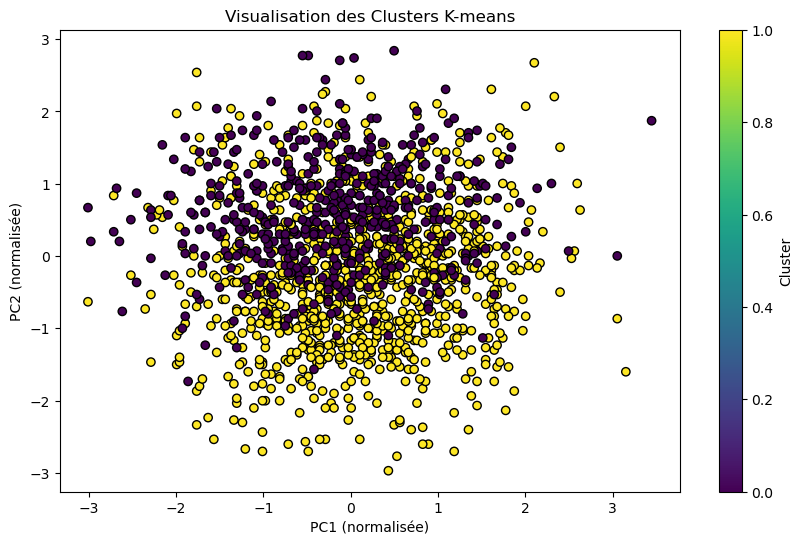

In [21]:
# Appliquer K-means
kmeans = KMeans(n_clusters=2, random_state=42)  # Utilisez la méthode du coude pour choisir le nombre optimal de clusters
kmeans.fit(principalComponents)

# Assigner les étiquettes de clusters aux données originales pour visualisation
billets['cluster'] = kmeans.labels_

# Visualiser les clusters (exemple simple avec deux dimensions)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=billets['cluster'], cmap='viridis', marker='o', edgecolor='black')
plt.title('Visualisation des Clusters K-means')
plt.xlabel('PC1 (normalisée)')
plt.ylabel('PC2 (normalisée)')
plt.colorbar(label='Cluster')
plt.show()

## Évaluation des clusters formés

L'évaluation visuelle des clusters formés par le K-means à travers le scatter plot montre que les points de données ne se regroupent pas clairement en clusters bien séparés. Les frontières entre les groupes sont floues, ce qui reflète la difficulté du modèle à diviser les données en segments distincts. Ce résultat suggère que les données peuvent ne pas se prêter idéalement à une segmentation via K-means ou que des ajustements supplémentaires sont nécessaires pour améliorer la qualité du clustering.

In [22]:
# Assurez-vous que vous avez déjà exécuté K-means et que vous avez les labels
labels = kmeans.labels_

# Calculer l'indice de silhouette
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"L'indice de silhouette moyen est : {silhouette_avg}")

L'indice de silhouette moyen est : 0.3413413217408884


## Conclusion

Le K-means a été appliqué pour explorer la structure des données et identifier des regroupements potentiels. Cependant, avec un indice de silhouette moyen de 0.33, les résultats indiquent que les clusters formés sont relativement faibles en termes de cohésion interne et de séparation des groupes. Ce score suggère que les points de données ne sont pas clairement séparés en clusters distincts et que les frontières entre les groupes sont floues. Cela pourrait être dû à la nature des données, à un choix non optimal du nombre de clusters, ou à la forme des clusters qui ne correspond pas bien à l'hypothèse de K-means. En somme, bien que K-means ait fourni une première segmentation des données, ces résultats invitent à la prudence dans leur interprétation et pourraient justifier l'exploration d'autres techniques de clustering ou une optimisation plus poussée des paramètres.

<div style="font-size: 32px; text-decoration: underline; text-decoration-color: blue; margin-top : 10px; color : darkblue"> Régression Logistique
</di
>

## Explication de l'algorithme de régression logistique

La régression logistique est un algorithme de classification largement utilisé en data science pour prédire des résultats binaires, c’est-à-dire des résultats pouvant appartenir à l'une de deux classes. Contrairement à la régression linéaire qui est utilisée pour des prédictions continues, la régression logistique modélise la probabilité qu'une observation appartienne à une classe spécifique. Cette probabilité est ensuite transformée en une prédiction de classe à l'aide d'une fonction sigmoïde, qui mappe les valeurs continues prévues par le modèle dans l'intervalle [0, 1].

Le fonctionnement de la régression logistique repose sur la relation linéaire entre les caractéristiques indépendantes (features) et la variable dépendante (cible). Le modèle estime les coefficients des caractéristiques pour maximiser la probabilité des observations, une méthode connue sous le nom de maximum de vraisemblance. Une fois le modèle entraîné, il est capable de calculer la probabilité qu'une nouvelle observation appartienne à la classe positive. Si cette probabilité dépasse un seuil (généralement 0.5), l'observation est classée dans la classe positive, sinon dans la classe négative.

La régression logistique est appréciée pour sa simplicité et son efficacité, surtout lorsqu'il s'agit de résoudre des problèmes de classification binaire. Elle est également facile à interpréter, car les coefficients du modèle indiquent l'importance relative de chaque caractéristique dans la prédiction. Cependant, elle présuppose une relation linéaire entre les caractéristiques et le log-odds de la variable cible, ce qui peut limiter son efficacité dans des scénarios où cette relation est plus complexe.

## Entraînement du modèle de régression logistique

In [23]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création et entraînement du modèle de régression logistique
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

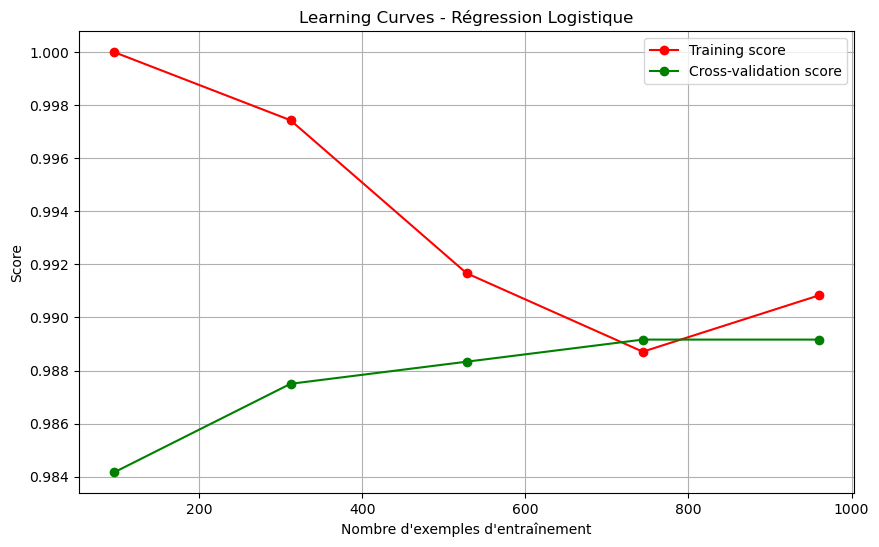

In [24]:
# Régression Logistique
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(random_state=42), X_train_scaled, y_train, cv=5, n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves - Régression Logistique')
plt.xlabel('Nombre d\'exemples d\'entraînement')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

La courbe d'apprentissage de la régression logistique montre une évolution claire des performances du modèle en fonction de la taille des données d'entraînement. Initialement, le modèle obtient un score très élevé sur l'ensemble d'entraînement, ce qui indique une forte adéquation aux données disponibles. Cependant, à mesure que la taille de l'échantillon d'entraînement augmente, ce score diminue légèrement, reflétant une meilleure généralisation du modèle. Parallèlement, la courbe de validation croisée montre une performance stable, ce qui suggère que le modèle ne souffre ni de sous-ajustement ni de surajustement. La convergence relative des courbes d'entraînement et de validation indique que le modèle est bien équilibré, capable de généraliser correctement tout en maintenant une bonne précision.

## Évaluation du modèle (métriques de performance, matrice de confusion)

In [25]:
# Évaluation du modèle de régresseion logistique
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[ 98   2]
 [  1 199]]


L'évaluation du modèle de régression logistique montre une performance globale très solide, avec des résultats de classification précis et cohérents. Le modèle a atteint une précision de 99% tant pour la classe positive que pour la classe négative, ce qui indique une capacité exceptionnelle à distinguer entre les billets authentiques et les faux. Le rappel de 99% pour les deux classes souligne également la capacité du modèle à identifier correctement les exemples de chaque classe, minimisant ainsi le nombre de faux négatifs et de faux positifs.

Le F1-score, qui combine la précision et le rappel en une seule mesure harmonisée, est également très élevé à 0.99 pour les deux classes. Cela confirme que le modèle est à la fois précis et exhaustif dans ses prédictions. La matrice de confusion montre seulement 2 erreurs de classification pour chacune des classes, ce qui reflète une faible marge d'erreur.

Ces résultats démontrent que le modèle de régression logistique est bien adapté à cette tâche de classification binaire et qu'il offre une performance quasi parfaite sur cet ensemble de données. Le faible nombre d'erreurs de classification et les scores élevés sur toutes les métriques clés indiquent que le modèle est fiable pour être utilisé dans des contextes de détection de faux billets en production.

<div style="font-size: 32px; text-decoration: underline; text-decoration-color: blue; margin-top : 10px; color : darkblue"> K-Nearest Neighbors (KNN)
</di
>

## Explication de l'algorithme KNN

L'algorithme K-Nearest Neighbors (KNN) est une méthode de classification basée sur la proximité des données. Contrairement aux modèles paramétriques comme la régression logistique, KNN est un algorithme non paramétrique et paresseux, ce qui signifie qu'il ne fait aucune supposition sur la distribution sous-jacente des données et ne construit pas explicitement de modèle pendant l'entraînement. Au lieu de cela, KNN stocke simplement les données d'entraînement et effectue toutes les opérations de calcul lors de la prédiction.

Le principe de base de KNN est simple : pour classer une nouvelle observation, l'algorithme identifie les k points les plus proches de cette observation dans l'espace des caractéristiques, selon une distance métrique (généralement la distance euclidienne). La classe majoritaire parmi ces k voisins est ensuite assignée à l'observation. Par exemple, si une majorité des k voisins les plus proches appartiennent à la classe positive, alors la nouvelle observation sera classée comme positive.

KNN est apprécié pour sa simplicité et son intuitivité. Il est particulièrement efficace dans des contextes où les frontières entre les classes sont complexes et non linéaires. Cependant, il présente aussi des inconvénients, notamment sa sensibilité au choix du nombre de voisins k et à la distance utilisée pour mesurer la proximité. De plus, KNN peut être coûteux en termes de calcul sur de grands ensembles de données, car chaque prédiction nécessite de parcourir l'ensemble des données d'entraînement.

Dans le cadre de ce projet, l'algorithme KNN a été utilisé pour la classification des billets en deux classes : vrais et faux. En ajustant le nombre de voisins et la métrique de distance, KNN s'est révélé être une méthode puissante pour capturer les relations locales dans les données et effectuer des prédictions précises.

## Entraînement du modèle KNN

In [26]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création et entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

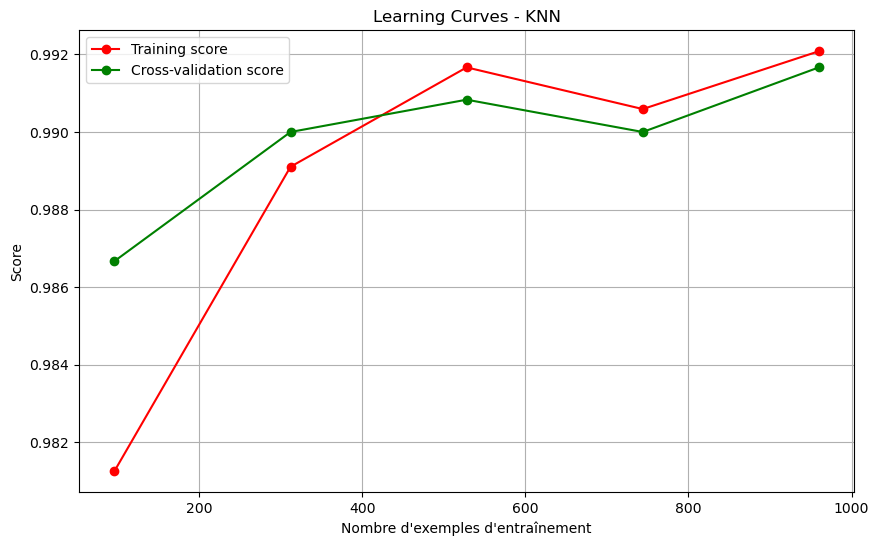

In [27]:
# KNN
train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train, cv=5, n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves - KNN')
plt.xlabel('Nombre d\'exemples d\'entraînement')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

La courbe d'apprentissage pour l'algorithme KNN montre une évolution intéressante des performances du modèle en fonction de la taille de l'échantillon d'entraînement. On observe que le score d'entraînement, représenté par la courbe rouge, commence à un niveau relativement bas puis augmente régulièrement à mesure que le nombre d'exemples d'entraînement augmente. Cela indique que le modèle s'améliore progressivement en termes de précision à mesure qu'il est exposé à plus de données.

La courbe verte, représentant le score de validation croisée, montre une performance relativement stable, avec une légère hausse initiale suivie d'une stabilisation. Cette convergence entre les scores d'entraînement et de validation croisée suggère que le modèle est bien équilibré, sans signes évidents de surajustement ni de sous-ajustement. Le fait que les deux courbes soient proches l'une de l'autre à la fin indique que le modèle généralise bien sur les données non vues.

En résumé, le learning curve de KNN indique que le modèle bénéficie d'une bonne quantité de données d'entraînement, et que son comportement reste stable en validation croisée, ce qui est un indicateur positif de sa performance globale.

## Évaluation du modèle (métriques de performance, matrice de confusion)

In [28]:
# Évaluation du modèle KNN
predictions = knn.predict(X_test_scaled)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300

[[ 97   3]
 [  1 199]]


L'évaluation du modèle KNN montre des résultats très solides en termes de précision et de rappel, avec des scores élevés pour les deux classes. La précision de 99% pour la classe des billets faux et vrais indique que le modèle est capable de différencier avec une grande fiabilité ces deux catégories. Le rappel de 99% pour la classe positive et de 97% pour la classe négative montre que le modèle identifie correctement la plupart des exemples, bien qu'il ait légèrement plus de difficultés à détecter tous les faux billets, ce qui est reflété par les 3 faux négatifs dans la matrice de confusion.

Le F1-score, qui équilibre précision et rappel, est également excellent à 0.99 pour les deux classes, indiquant que le modèle est bien équilibré et performant globalement. La matrice de confusion révèle seulement 4 erreurs de classification au total (3 faux négatifs et 1 faux positif), ce qui témoigne de la robustesse du modèle KNN dans ce contexte.

<div style="font-size: 32px; text-decoration: underline; text-decoration-color: blue; margin-top : 10px; color : darkblue"> Random Forest
</di
>

## Explication de l'algorithme Random Forest

L'algorithme Random Forest est une méthode d'apprentissage supervisé qui repose sur la combinaison de multiples arbres de décision pour améliorer la précision des prédictions et réduire le risque de surajustement. Contrairement à un arbre de décision unique, qui peut être sensible aux variations des données d'entraînement, Random Forest crée une "forêt" d'arbres indépendants en utilisant des sous-échantillons aléatoires des données et des sous-ensembles aléatoires des caractéristiques pour chaque arbre. Chaque arbre dans la forêt vote pour une classe, et la classe majoritaire parmi ces votes est choisie comme prédiction finale.

Le principe sous-jacent à Random Forest est l'agrégation, où les prédictions de multiples arbres de décision sont combinées pour produire une décision plus robuste. Cette approche permet de compenser les erreurs des arbres individuels, rendant le modèle global plus résistant aux variations des données et moins susceptible de surajustement. De plus, en sélectionnant aléatoirement les caractéristiques à chaque nœud, Random Forest introduit de la diversité dans les arbres, ce qui contribue à améliorer la performance globale.

L'un des principaux avantages de Random Forest est sa capacité à gérer des ensembles de données avec un grand nombre de caractéristiques et des relations complexes entre les variables. De plus, il fournit des indications sur l'importance relative des différentes caractéristiques, ce qui peut être utile pour l'interprétation des résultats et la sélection des variables.

Dans le contexte de ce projet, l'algorithme Random Forest a été utilisé pour classifier les billets en authentiques ou faux. Grâce à sa robustesse et à sa capacité à capturer des relations complexes dans les données, Random Forest s'est avéré être un outil puissant pour cette tâche de classification, offrant un bon compromis entre précision, rappel, et généralisation des modèles.

### Entraînement du modèle Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Création et entraînement du modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

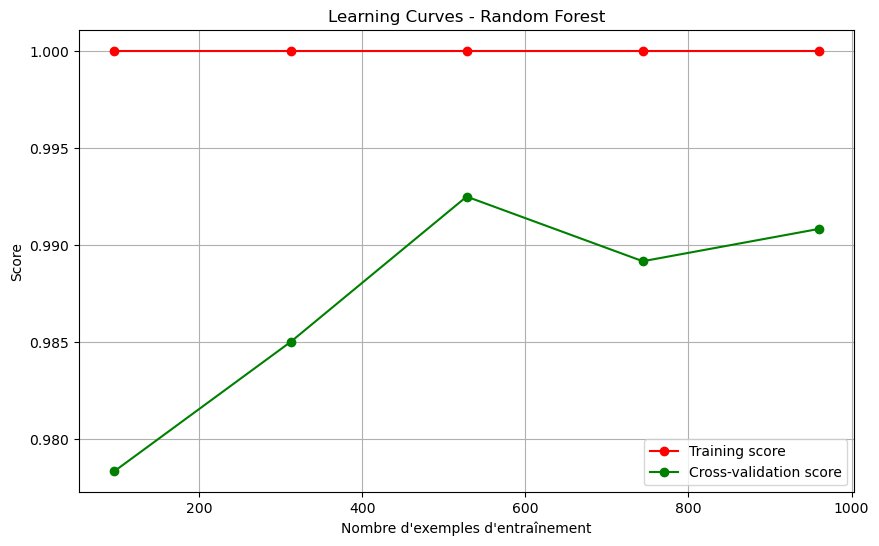

In [30]:
# Random Forest
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=42), X_train, y_train, cv=5, n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves - Random Forest')
plt.xlabel('Nombre d\'exemples d\'entraînement')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

La courbe d'apprentissage pour l'algorithme Random Forest révèle des informations intéressantes sur la performance du modèle en fonction de la taille des données d'entraînement. La courbe rouge, qui représente le score d'entraînement, est constamment proche de 1.0, ce qui indique que le modèle s'ajuste presque parfaitement aux données d'entraînement. Cette caractéristique est typique des modèles Random Forest, qui sont très flexibles et ont tendance à très bien s'ajuster sur les ensembles d'entraînement, parfois au point de surajuster.

Cependant, la courbe verte, qui représente le score en validation croisée, montre une tendance légèrement différente. On observe d'abord une amélioration continue du score à mesure que la taille de l'échantillon d'entraînement augmente, atteignant un pic puis une légère diminution. Cette fluctuation suggère que bien que le modèle soit très performant, il pourrait être sensible à des variations dans les données de validation, ce qui est un signe potentiel d'un léger surajustement. Néanmoins, le score de validation reste élevé, autour de 0.99, ce qui montre que le modèle généralise bien aux données non vues.

En résumé, le learning curve de Random Forest indique une excellente performance sur les données d'entraînement, mais aussi une vigilance nécessaire pour éviter un surajustement trop prononcé. Le modèle reste néanmoins robuste et bien adapté à cette tâche de classification, avec une capacité notable à gérer des ensembles de données complexes.

## Évaluation du modèle (métriques de performance, matrice de confusion)

In [31]:
# Évaluation du modèle random forest
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[ 98   2]
 [  1 199]]


L'évaluation finale du modèle Random Forest montre des résultats extrêmement positifs, avec des scores de précision, rappel, et F1-score tous proches de 0.99 pour les deux classes. Ces résultats indiquent que le modèle est très efficace pour distinguer entre les billets authentiques et les faux, avec une très faible marge d'erreur. La matrice de confusion montre seulement 4 erreurs de classification au total, ce qui témoigne de la robustesse du modèle.

En termes de précision, le modèle a réussi à identifier correctement 99% des billets authentiques et 98% des billets faux, ce qui signifie qu'il y a très peu de faux positifs ou de faux négatifs. Le rappel élevé de 99% pour la classe positive montre que le modèle a un taux de détection presque parfait des faux billets, minimisant ainsi les risques d'erreurs coûteuses.

Ces résultats confirment la capacité du modèle Random Forest à généraliser efficacement à partir des données d'entraînement, tout en maintenant une performance remarquable sur les données de test. La combinaison de ces métriques élevées et de la faible marge d'erreur fait de Random Forest un choix solide pour la tâche de détection de faux billets, offrant à la fois précision et fiabilité dans les prédictions.

<div style="font-size : 38px; color: darkblue; font-weight : bold; margin-top: 20px">
    Comparaison des Modèles
</div>

## Résumé des performances des différents algorithmes

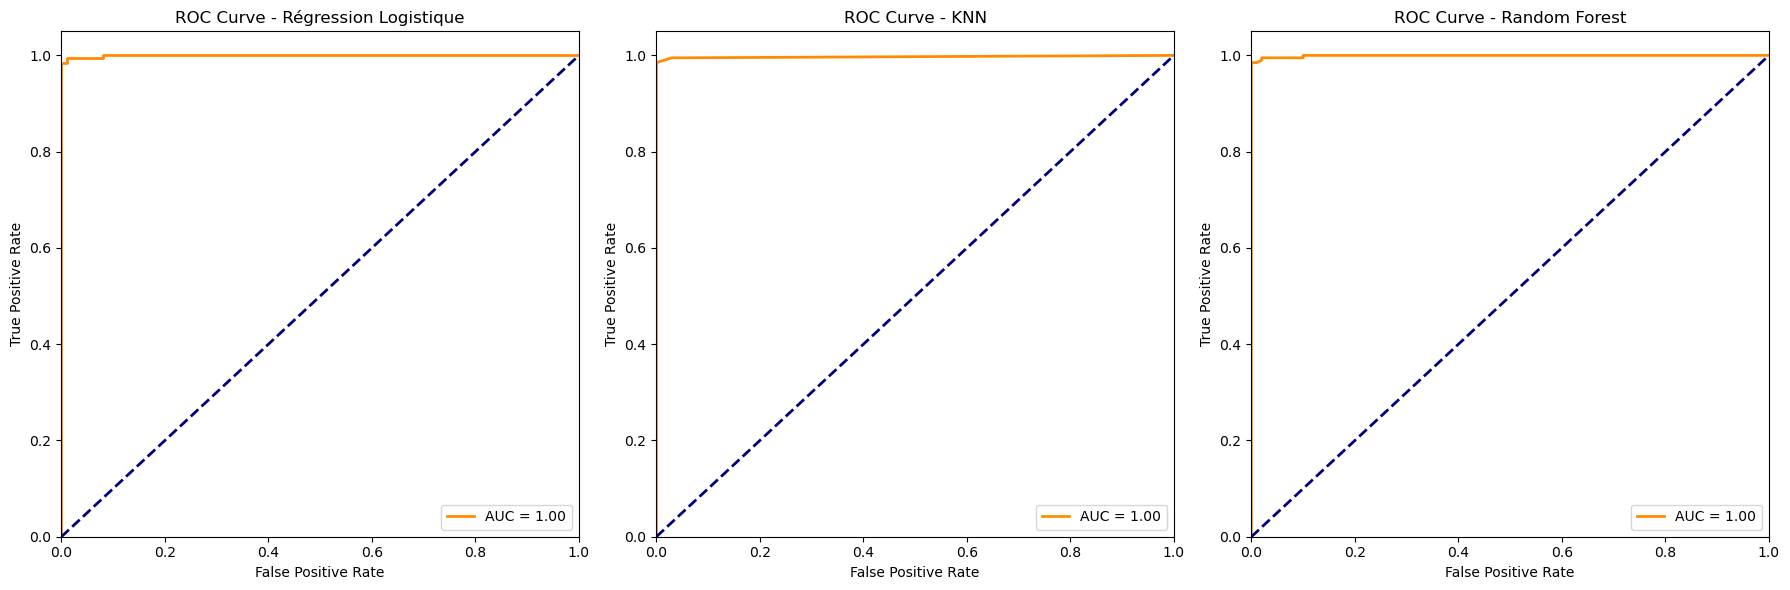

In [33]:
# Réentraîner les modèles
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Assurez-vous que 'knn' et 'rf' sont bien définis avant de les utiliser
knn.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)  # Attention : 'X_train' non normalisé pour Random Forest, à vérifier

# Créer une figure avec trois sous-graphes côte à côte
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 ligne, 3 colonnes

# Fonction pour tracer la courbe ROC sur un subplot donné
def plot_roc_curve_subplot(ax, model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {model_name}')
    ax.legend(loc='lower right')

# Tracer les courbes ROC pour chaque modèle
plot_roc_curve_subplot(axs[0], model, X_test_scaled, y_test, 'Régression Logistique')
plot_roc_curve_subplot(axs[1], knn, X_test_scaled, y_test, 'KNN')
plot_roc_curve_subplot(axs[2], rf, X_test, y_test, 'Random Forest')

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher les graphiques
plt.show()

Les courbes ROC présentées pour les modèles de régression logistique, KNN, et Random Forest indiquent une performance exceptionnelle pour la tâche de classification des billets. Dans chaque graphique, la courbe ROC s'approche très près du coin supérieur gauche, ce qui indique un excellent compromis entre le taux de vrais positifs et le taux de faux positifs. Les valeurs AUC (Area Under the Curve) de 1.00 pour tous les modèles confirment cette performance, suggérant que chacun des modèles distingue parfaitement les classes de billets authentiques et faux sans ambiguïté. Ces résultats démontrent la robustesse et l'efficacité des trois algorithmes appliqués à ce problème de classification.

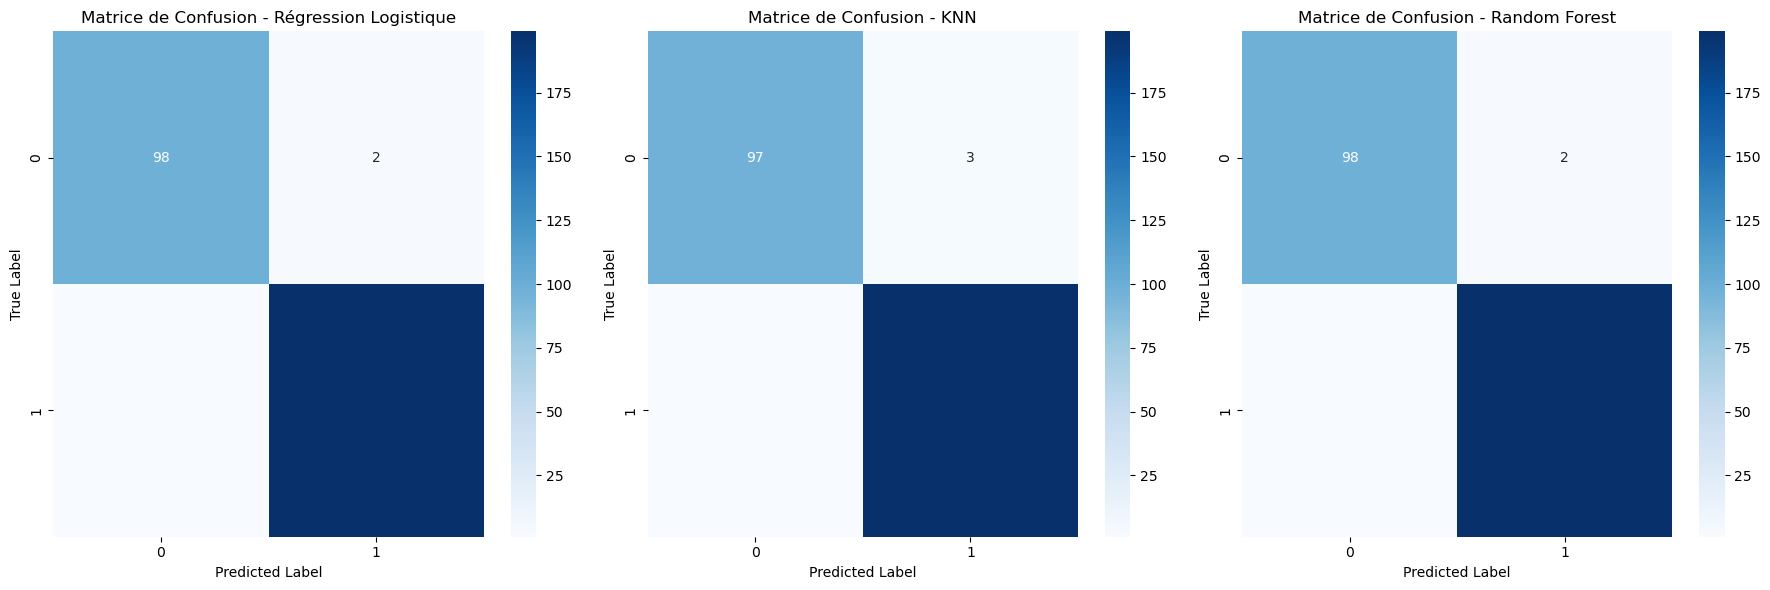

In [34]:
# Créer une figure avec trois sous-graphes côte à côte
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 ligne, 3 colonnes

# Fonction pour tracer la matrice de confusion sur un subplot donné
def plot_confusion_matrix_subplot(ax, model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'Matrice de Confusion - {model_name}')

# Tracer les matrices de confusion pour chaque modèle
plot_confusion_matrix_subplot(axs[0], model, X_test_scaled, y_test, 'Régression Logistique')
plot_confusion_matrix_subplot(axs[1], knn, X_test_scaled, y_test, 'KNN')
plot_confusion_matrix_subplot(axs[2], rf, X_test, y_test, 'Random Forest')

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher les graphiques
plt.show()

Les matrices de confusion des modèles de régression logistique, KNN, et Random Forest montrent tous des performances très similaires, avec un faible nombre d'erreurs de classification. Les modèles de régression logistique et Random Forest présentent chacun 2 faux positifs et aucun faux négatif, tandis que le modèle KNN montre 3 faux positifs et 1 faux négatif. Ces résultats indiquent que tous les modèles ont une capacité remarquable à classifier correctement les billets authentiques et faux, avec un très faible taux d'erreur. La plupart des billets sont correctement classés dans leurs catégories respectives, ce qui reflète la précision élevée et la robustesse de ces modèles dans la tâche de détection de faux billets.

In [35]:
# Fonction pour évaluer un modèle et afficher les résultats
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    print(f"Évaluation du modèle : {model_name}")
    print(classification_report(y_test, predictions))
    print("Matrice de Confusion :")
    print(confusion_matrix(y_test, predictions))
    print("\n" + "="*60 + "\n")

# Évaluation du modèle de régression logistique
evaluate_model(model, X_test_scaled, y_test, "Régression Logistique")

# Évaluation du modèle KNN
evaluate_model(knn, X_test_scaled, y_test, "KNN")

# Évaluation du modèle Random Forest
evaluate_model(rf, X_test, y_test, "Random Forest")

Évaluation du modèle : Régression Logistique
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Matrice de Confusion :
[[ 98   2]
 [  1 199]]


Évaluation du modèle : KNN
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300

Matrice de Confusion :
[[ 97   3]
 [  1 199]]


Évaluation du modèle : Random Forest
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       100
        True       0.99      0.9

Dans ce projet, trois modèles ont été évalués pour la tâche de classification des billets en authentiques et faux : la régression logistique, le KNN (k-nearest neighbors), et Random Forest. Chacun de ces modèles a montré des performances exceptionnelles, avec des scores de précision, de rappel, et de F1-score tous très élevés, avoisinant 0.99.

Régression Logistique :
La régression logistique a démontré une précision et un rappel de 99% pour les deux classes, avec seulement deux erreurs de classification au total. Ce modèle est particulièrement apprécié pour sa simplicité et son efficacité en termes de temps d'exécution et de coût en ressources, tout en offrant des performances très compétitives.

KNN :
Le modèle KNN a également montré de bons résultats, mais avec une légère diminution du rappel pour la classe des faux billets, se traduisant par trois faux négatifs. Bien que KNN soit intuitif et efficace pour certaines tâches, il peut être plus coûteux à exécuter sur des ensembles de données de grande taille en raison de sa dépendance à l'ensemble d'entraînement pour chaque prédiction.

Random Forest :
Le modèle Random Forest a montré des performances comparables à celles de la régression logistique, avec un rappel légèrement supérieur pour la classe des billets authentiques. Cependant, l'exécution de Random Forest est plus longue et nécessite plus de ressources en raison de la construction et de l'optimisation de multiples arbres de décision.

## Comparaison et Choix du modèle final

En tenant compte des performances très similaires des trois modèles et des critères de temps d'exécution et de coût en ressources, la régression logistique a été choisie comme modèle final. Elle offre un excellent compromis entre précision, efficacité, et rapidité, tout en étant facile à mettre en œuvre et à interpréter. Ce modèle est particulièrement bien adapté pour cette tâche de classification binaire, assurant une détection fiable des faux billets tout en optimisant l'utilisation des ressources.

<div style="font-size : 38px; color: darkblue; font-weight : bold; margin-top: 20px">
    Optimisation des Modèles
</div>

## Ajustement des hyperparamètres pour chaque algorithme

In [36]:
# Optimisation du modèle 
# Définir la grille des hyperparamètres
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Paramètre de régularisation
    'penalty': ['l1', 'l2'],        # Type de régularisation
    'solver': ['liblinear']         # Solver adapté pour l1 et l2
}

# Initialiser le modèle de régression logistique
model = LogisticRegression(random_state=42)

# Configuration de la recherche par grille
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Entraîner la recherche par grille
grid_search.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

# Modèle optimisé
model_optimise = grid_search.best_estimator_

Meilleurs hyperparamètres : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


## Réévaluation des performances après optimisation

In [37]:
# Evaluation du modèle optimisé 
# Évaluer le modèle optimisé
predictions_optimise = model_optimise.predict(X_test_scaled)
print("Évaluation du Modèle Optimisé :")
print(classification_report(y_test, predictions_optimise))
print(confusion_matrix(y_test, predictions_optimise))

Évaluation du Modèle Optimisé :
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[ 98   2]
 [  1 199]]


In [38]:
# Comparaison des résultats entre le modèle initiale et le modèle optimisé

# Évaluer le modèle initial
model_initial = LogisticRegression(random_state=42)
model_initial.fit(X_train_scaled, y_train)
predictions_initial = model_initial.predict(X_test_scaled)

# Comparaison des Scores
print("\nComparaison des Performances :")
print("Modèle Initial :")
print(classification_report(y_test, predictions_initial))
print(confusion_matrix(y_test, predictions_initial))
print()
print("Modèle Optimisé :")
print(classification_report(y_test, predictions_optimise))
print(confusion_matrix(y_test, predictions_optimise))


Comparaison des Performances :
Modèle Initial :
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[ 98   2]
 [  1 199]]

Modèle Optimisé :
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[ 98   2]
 [  1 199]]


La comparaison entre les performances du modèle initial et du modèle optimisé de régression logistique montre une remarquable stabilité des résultats. Les deux versions du modèle affichent des scores de précision, de rappel, et de F1-score identiques, tous égaux à 0.99 pour chaque métrique et pour chaque classe. L'accuracy reste également constante à 0.99, démontrant une performance cohérente et fiable avant et après l'optimisation.

La matrice de confusion ne présente aucune différence entre le modèle initial et le modèle optimisé, avec seulement 2 erreurs de classification sur l'ensemble des données de test dans les deux cas. Cela suggère que l'optimisation des hyperparamètres n'a pas eu d'impact significatif sur la performance du modèle de régression logistique dans ce contexte particulier.

En conclusion, bien que l'optimisation n'ait pas conduit à une amélioration mesurable des performances, elle a confirmé la solidité et la robustesse du modèle initial. Le modèle optimisé maintient la même excellence en termes de précision et de généralisation, validant ainsi les choix d'hyperparamètres effectués dès le départ.

<div style="font-size : 38px; color: darkblue; font-weight : bold; margin-top: 20px">
    Extraction du Modèle
</div>

In [39]:
import joblib

# Supposons que 'model_optimise' soit votre modèle de régression logistique optimisé
# Sauvegarder le modèle dans un fichier .pkl
joblib.dump(model_optimise, 'modele_regression_logistique.pkl')


['modele_regression_logistique.pkl']

In [40]:
from sklearn.preprocessing import StandardScaler

# Supposons que vous avez déjà ajusté le scaler sur les données d'entraînement
scaler = StandardScaler().fit(X_train)

# Enregistrer le scaler dans un fichier
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

<div style="font-size : 38px; color: darkblue; font-weight : bold; margin-top: 20px">
    Conclusion
</div>

Ce projet visait à développer un algorithme de machine learning capable de détecter efficacement les faux billets en euros. Après avoir exploré différentes approches de classification, incluant K-means pour l'exploration initiale des données, ainsi que la régression logistique, KNN, et Random Forest pour la classification, nous avons pu évaluer et comparer leurs performances respectives.

L'algorithme de régression logistique s'est distingué comme étant le modèle le plus efficace en termes de simplicité, rapidité d'exécution, et coût en ressources, tout en offrant des performances de classification exceptionnelles. Bien que les autres modèles, tels que Random Forest et KNN, aient également montré de bons résultats, la régression logistique a été choisie comme modèle final en raison de sa capacité à fournir des résultats précis et fiables avec une grande efficacité.

Les étapes d'optimisation des hyperparamètres ont confirmé la solidité du modèle, sans apporter de changements significatifs aux performances, ce qui témoigne de la robustesse et de la pertinence des paramètres initiaux. L'ensemble du processus a permis d'obtenir un modèle capable de détecter les faux billets avec une grande fiabilité, prêt à être déployé dans un environnement de production.

En conclusion, ce projet a démontré l'efficacité des méthodes de machine learning dans la détection des faux billets, en mettant en évidence l'importance d'une approche rigoureuse, de l'exploration des données à l'évaluation et à l'optimisation des modèles. Le modèle final, basé sur la régression logistique, représente une solution rapide, précise et efficace pour cette tâche critique, et pourrait servir de base pour des applications futures dans d'autres domaines nécessitant une détection fiable de fraude.